In [1]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
# Carregar o dataset
df = pd.read_csv('Sample - Superstore.csv', sep=',', encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [27]:
# Visualizar estrutura dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [29]:
# Verificar estatísticas básicas
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [30]:
# Checar valores nulos ou faltantes
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [32]:
# Checar linhas duplicadas
df.duplicated().sum()

np.int64(0)

In [33]:
# Checar IDs duplicados
df['Row ID'].duplicated().sum()

np.int64(0)

In [31]:
# Tratar colunas de data
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [39]:
# Criar colunas novas com mês e ano da compra
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015


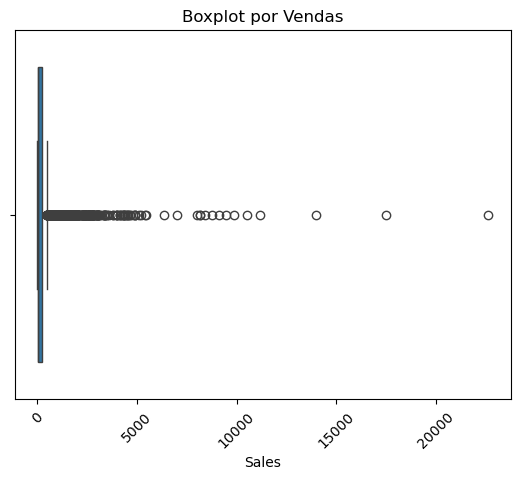

In [140]:
# Boxplot para identificação de outliers na categoria Sales
sns.boxplot(x='Sales', data=df)

plt.title('Boxplot por Vendas')
plt.xticks(rotation=45)
plt.show()

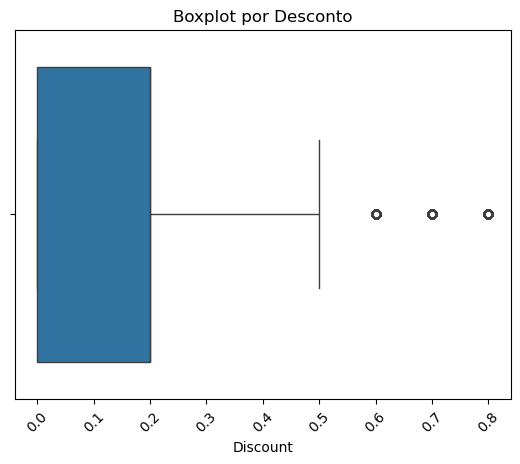

In [141]:
# Boxplot para identificação de outliers na categoria Discount
sns.boxplot(x='Discount', data=df)

plt.title('Boxplot por Desconto')
plt.xticks(rotation=45)
plt.show()

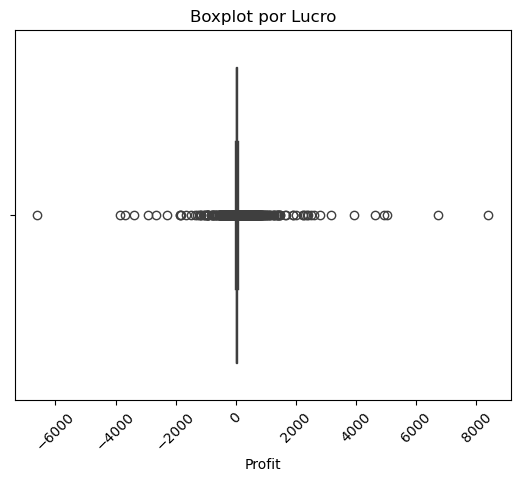

In [142]:
# Boxplot para identificação de outliers na categoria Profit
sns.boxplot(x='Profit', data=df)

plt.title('Boxplot por Lucro')
plt.xticks(rotation=45)
plt.show()

In [40]:
# Análise exploratória dos dados (EDA) inicial 
# Entender dados numéricos, como distribuição, médias, mínimos e máximos
df[['Sales', 'Profit', 'Quantity']].describe()

,Sales,Profit,Quantity
count,9994.000000,9994.000000,9994.000000
mean,229.858001,28.656896,3.789574
std,623.245101,234.260108,2.225110
min,0.444000,-6599.978000,1.000000
25%,17.280000,1.728750,2.000000
50%,54.490000,8.666500,3.000000
75%,209.940000,29.364000,5.000000
max,22638.480000,8399.976000,14.000000


In [49]:
# Identificar quantidade de categorias e sub-categorias únicas 
df[['Category','Sub-Category']].describe()

,Category,Sub-Category
count,9994,9994
unique,3,17
top,Office Supplies,Binders
freq,6026,1523


In [151]:
# Identificar categorias e produtos mais vendidos
vendas_categoria = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print(vendas_categoria)

vendas_subcategoria = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
print(vendas_subcategoria)

Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64
Sub-Category
Phones         330007.0540
Chairs         328449.1030
Storage        223843.6080
Tables         206965.5320
Binders        203412.7330
Machines       189238.6310
Accessories    167380.3180
Copiers        149528.0300
Bookcases      114879.9963
Appliances     107532.1610
Furnishings     91705.1640
Paper           78479.2060
Supplies        46673.5380
Art             27118.7920
Envelopes       16476.4020
Labels          12486.3120
Fasteners        3024.2800
Name: Sales, dtype: float64


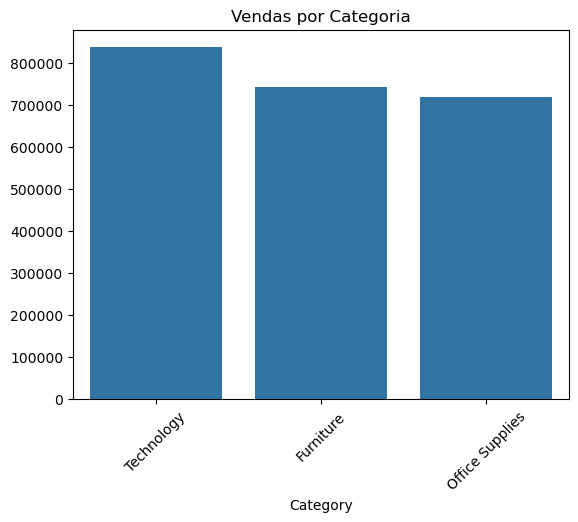

In [152]:
# Gráfica de barras para visualização do número de pedidos por cada categoria
sns.barplot(x=vendas_categoria.index, y=vendas_categoria.values)

plt.xticks(rotation=45)
plt.title('Vendas por Categoria')
plt.show()

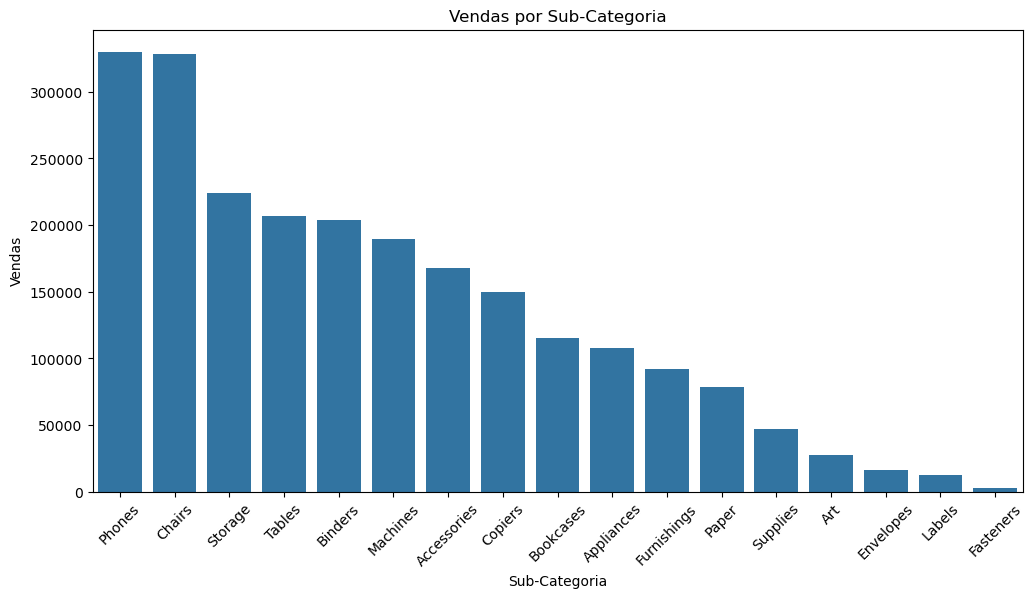

In [150]:
# Gráfica de barras para visualização do número de pedidos por cada sub-categoria
plt.figure(figsize=(12,6))
sns.barplot(x=vendas_subcategoria.index, y=vendas_subcategoria.values)

plt.title('Vendas por Sub-Categoria')
plt.xticks(rotation=45)
plt.ylabel('Vendas')
plt.xlabel('Sub-Categoria')
plt.show()

In [122]:
# Identificar lucro total anual
vendas_ano = df.groupby('Year')[['Sales', 'Profit']].sum()
vendas_ano

,Sales,Profit
Year,,
2014,484247.4981,49543.9741
2015,470532.5090,61618.6037
2016,609205.5980,81795.1743
2017,733215.2552,93439.2696


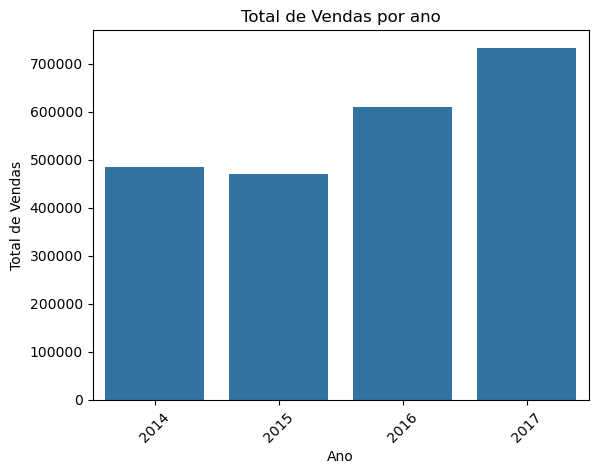

In [126]:
# Gráfico de barras para exibir o total de vendas por ano
sales_ano = df.groupby('Year')['Sales'].sum()
sns.barplot(x = sales_ano.index, y= sales_ano.values)

plt.title('Total de Vendas por ano')
plt.xticks(rotation=45)
plt.ylabel('Valor de Vendas')
plt.xlabel('Ano')
plt.show()

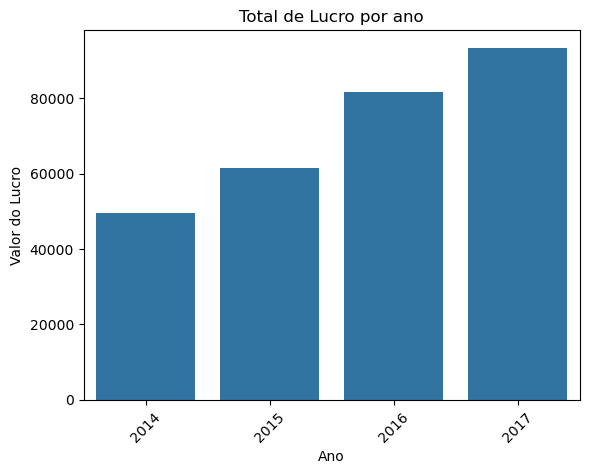

In [128]:
# Gráfico de barras para exibir o total de lucro por ano
profit_ano = df.groupby('Year')['Profit'].sum()
sns.barplot(x = profit_ano.index, y = profit_ano.values)

plt.title('Total de Lucro por ano')
plt.xticks(rotation=45)
plt.ylabel('Valor do Lucro')
plt.xlabel('Ano')
plt.show()

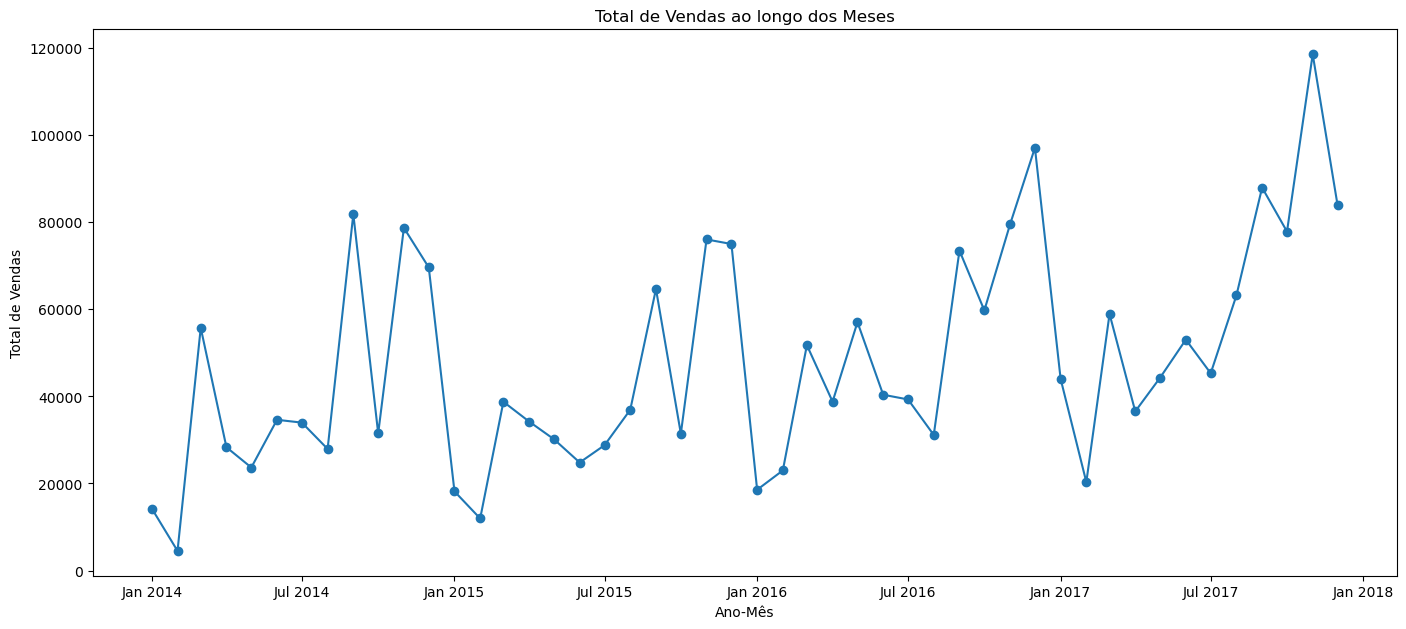

In [129]:
# Gráfico de linhas para exibir total de vendas ao longo dos meses, visando identificar possível sazonalidade
df['Year-Month'] = df['Order Date'].dt.to_period('M').dt.to_timestamp()
vendas_mensais = df.groupby('Year-Month')['Sales'].sum()

plt.figure(figsize=(14,6))
plt.plot(vendas_mensais.index, vendas_mensais.values, marker='o')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.tight_layout()
plt.title('Total de Vendas ao longo dos Meses')
plt.xlabel('Ano-Mês')
plt.ylabel('Total de Vendas')
plt.show()

In [137]:
# Identificar vendas e lucro por região
vendas_regiao = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print(vendas_regiao)

lucro_regiao = df.groupby('Region')['Profit'].sum().sort_values()
print(lucro_regiao)

Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64
Region
Central     39706.3625
South       46749.4303
East        91522.7800
West       108418.4489
Name: Profit, dtype: float64


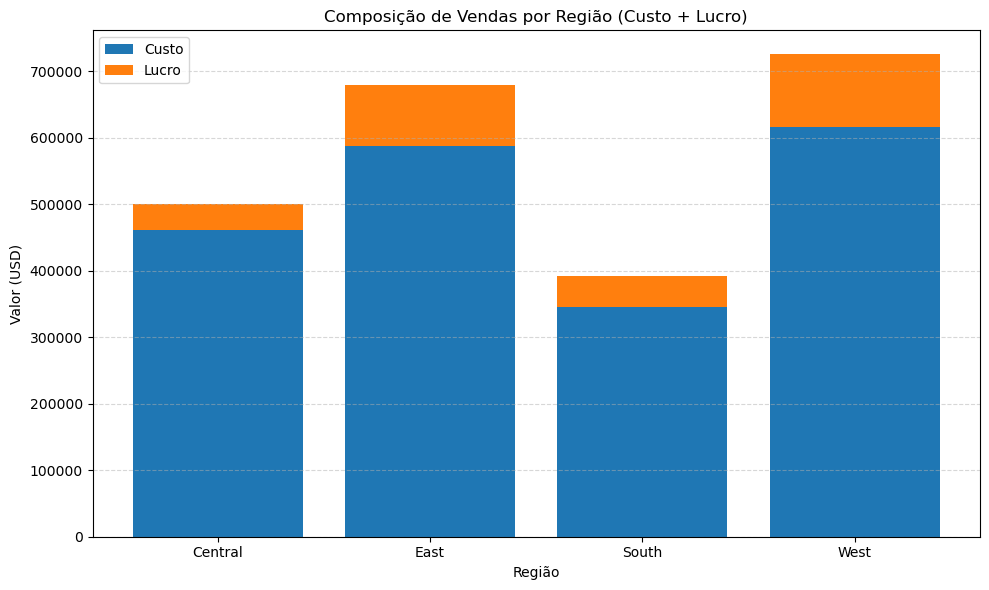

In [149]:
# Gráfico de barras empilhadas para mostrar a composição de quanto das
# vendas de cada região é lucro e quanto é custo 
resumo = df.groupby('Region')[['Sales', 'Profit']].sum()
resumo['Cost'] = resumo['Sales'] - resumo['Profit']

categorias = resumo.index
custo = resumo['Cost'].values
lucro = resumo['Profit'].values

x = np.arange(len(categorias))

plt.figure(figsize=(10,6))

plt.bar(x, custo, label='Custo')
plt.bar(x, lucro, bottom=custo, label='Lucro') 

plt.xticks(x, categorias)
plt.title('Composição de Vendas por Região (Custo + Lucro)')
plt.xlabel('Região')
plt.ylabel('Valor')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [156]:
# Exportar o DataFrame tratado para arquivo .xlsx para análise e visualização no Power BI
df.to_excel('superstore_tratado.xlsx', index=False)